In [1]:
import pandas as pd

In [14]:
df = pd.read_csv (r'/Users/Hamza/Downloads/dataSecondary.csv')
dfPrimary = pd.read_csv (r'/Users/Hamza/Downloads/dataPrimary.csv')
dfEx = pd.read_csv (r'/Users/Hamza/Downloads/dataEx.csv')
dfA = pd.read_csv (r'/Users/Hamza/Downloads/dataAlevel.csv')
dfAdm = pd.read_csv (r'/Users/Hamza/Downloads/dataAdmin.csv')
dfFSM = pd.read_csv (r'/Users/Hamza/Downloads/dataFSM.csv')
dfPHE = pd.read_csv (r'/Users/Hamza/Downloads/dataProgressionToHE.csv')

df = df.drop(columns=['location','geographic_level','time_period','school_phase'])
df = df.sort_values('location_code')
df = df.rename(columns={"location_code": "LA code",df.columns[1]:"3rd Pref %S",
                       df.columns[2]:"Non Preferred Offer %S",df.columns[3]:"No Offer %S",
                        df.columns[4]:"Offer in diff LA code %S"})


#Primary School
dfPrimary = dfPrimary.drop(columns=['location','geographic_level','time_period','school_phase'])
dfPrimary = dfPrimary.sort_values('location_code')
dfPrimary = dfPrimary.rename(columns={"location_code": "LA code",dfPrimary.columns[1]:"3rd Pref %P",
                       dfPrimary.columns[2]:"Non Preferred Offer %P",dfPrimary.columns[3]:"No Offer %P",
                        dfPrimary.columns[4]:"Offer in diff LA code %P"})

print(dfPrimary)
#Permanent Exclusions
dfEx = dfEx.drop(columns=['location','geographic_level','time_period','school_type'])
dfEx = dfEx.sort_values('location_code')
dfEx = dfEx.rename(columns={"location_code": "LA code"})

#A levels
dfA = dfA.drop(columns=['location','geographic_level','time_period','characteristic_value'])
dfA  = dfA.sort_values('location_code')
dfA  = dfA.rename(columns={"location_code": "LA code","pc_achieving_atleast_two_alev":"<2 A levels",
                          "pc_achieving_aab_or_better_alev":"< AAB"})
dfA["<2 A levels"] = dfA["<2 A levels"].div(100)
dfA["<2 A levels"] = dfA["<2 A levels"].mul(-1).add(1)
dfA["< AAB"] = dfA["< AAB"].div(100)
dfA["< AAB"] = dfA["< AAB"].mul(-1).add(1)

#Admissions appeals
dfAdm = dfAdm.drop(columns=['location','geographic_level','time_period','school_phase'])
dfAdm = dfAdm.sort_values('location_code')
dfAdm = dfAdm.rename(columns={"successful_appeals_percentage": "Unsuccessful Appeals","location_code":"LA code"})
dfAdm["Unsuccessful Appeals"] = dfAdm["Unsuccessful Appeals"].div(100).mul(-1).add(1)
#Free School Meals
dfFSM = dfFSM.drop(columns=['location','geographic_level','time_period','phase'])
dfFSM = dfFSM.sort_values('location_code')
dfFSM = dfFSM.rename(columns={"fsm_eligible_percent": "FSM Eligible %","location_code":"LA code"})
#Progression to Higher Education
dfPHE = dfPHE.drop(columns=['location','geographic_level','time_period','data_type','level_methodology','institution_group',
                           'characteristic'])
dfPHE = dfPHE.sort_values('location_code')
dfPHE = dfPHE.rename(columns={"location_code": "LA code","all_degree":"% of ppl not doing degrees"})
dfPHE['% of ppl not doing degrees'] = dfPHE['% of ppl not doing degrees'].div(100).mul(-1).add(1)
#print(dfPHE)




       LA code  3rd Pref %P  Non Preferred Offer %P  No Offer %P  \
3    E06000001     0.187970                0.375940     0.000000   
4    E06000002     1.511335                2.770781     0.100756   
8    E06000003     0.263331                0.526662     0.000000   
10   E06000004     0.672269                0.504202     0.084034   
0    E06000005     0.356824                1.338091     0.000000   
..         ...          ...                     ...          ...   
82   E10000029     0.842277                1.589458     0.000000   
98   E10000030     2.409455                2.943195     0.007625   
70   E10000031     1.372706                3.192338     0.063847   
100  E10000032     2.110122                1.351797     0.032971   
72   E10000034     1.028739                2.008491     0.391901   

     Offer in diff LA code %P  
3                    0.827206  
4                    2.695956  
8                    1.371653  
10                   1.044277  
0                    0.

In [3]:
loneliness_data = pd.read_csv(r'/Users/Hamza/Downloads/msoa_loneliness.csv')
msoa_la_code_df = pd.read_csv(r'/Users/Hamza/Downloads/PCD_OA_LSOA_MSOA_LAD_FEB22_UK_LU.csv', encoding='latin-1') #change encoding to fix read error
#get LA code from msoa code
msoa_code_rows = msoa_la_code_df.loc[msoa_la_code_df['msoa11cd'].isin(loneliness_data['msoa11cd'])]
msoa_code_conv = dict(zip(msoa_code_rows['msoa11cd'],msoa_code_rows['ladcd']))
loneliness_data['LA code'] = loneliness_data['msoa11cd'].apply(lambda x: msoa_code_conv[x])
#print(loneliness_data)

LA_counts = loneliness_data.groupby('LA code').count()
LA_index_sum = loneliness_data.groupby('LA code').sum()['loneills_2018']
LA_index_average = LA_index_sum / LA_counts['msoa11cd']


# 1st attempted to merge by name - better to use LA codes

#perform the grouping by the local authority names of the msoas
# loneliness_data['msoa11nm']  = loneliness_data['msoa11nm'].str[:-4] # Strip numbers off names
# LA_counts = loneliness_data.groupby('msoa11nm').count()
# LA_index_sum = loneliness_data.groupby('msoa11nm').sum()['loneills_2018']
# LA_index_average = LA_index_sum / LA_counts['msoa11cd']

lonely_index_average = LA_index_average.rename('lonely_avg').to_frame()
print(lonely_index_average)# loneliness index average for each LA

/Users/hamza/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


           lonely_avg
LA code              
E06000001   -0.542761
E06000002    1.316155
E06000003    0.649266
E06000004    0.635474
E06000005    0.967079
...               ...
E09000029    0.922554
E09000030   -1.569304
E09000031   -0.738428
E09000032    0.855884
E09000033    0.243843

[309 rows x 1 columns]


In [77]:
#Joining datasets with eachother

dfJ1 = df.set_index('LA code').join(dfEx.set_index('LA code'))
dfJ2 = dfA.join(dfJ1,on= 'LA code')
dfJ3 = dfJ2.set_index('LA code').join(dfAdm.set_index('LA code'))
dfJ4 = dfFSM.join(dfJ3,on= 'LA code')

dfJ5 = dfJ4.set_index('LA code').join(dfPHE.set_index('LA code'))

dfJ6 = dfPrimary.join(dfJ5,on= 'LA code')
#dfJ5 = dfJ5.reset_index(level = 0)
dfJ6['FSM Eligible %']=dfJ6['FSM Eligible %'].div(100)
cols = dfJ6.columns.tolist()



#reordering columns so primary and secondary school values are adjacent
cols = cols[0:5] + cols[8:12] + cols[5:8] + cols[12:15]

dfJ6 = dfJ6[cols]
#convert first 8 columns to decimal %
for i in range(1,9):
    dfJ6[dfJ6.columns[i]] = dfJ6[dfJ6.columns[i]].div(100)
#cpnverting all columns to %    
for i in range(1,15):
    dfJ6[dfJ6.columns[i]] = dfJ6[dfJ6.columns[i]].mul(100)
    
dfJ6.to_csv(r'/Users/Hamza/Downloads/ADS-Loneliness/School Offers/bigDataset.csv')

print(dfJ6)

# Joining datasets with loneliness
main_df = df.join(lonely_index_average,on= 'LA code')
dfP = dfPrimary.join(lonely_index_average,on= 'LA code')
main_dfEx = dfEx.join(lonely_index_average,on= 'LA code')
main_dfA = dfA.join(lonely_index_average,on= 'LA code')
main_dfAdm = dfAdm.join(lonely_index_average,on= 'LA code')
main_dfFSM = dfFSM.join(lonely_index_average,on= 'LA code')
main_dfPHE = dfPHE.join(lonely_index_average,on= 'LA code')



# removing NAs
main_df = main_df.loc[main_df['lonely_avg'].notna()]
main_dfEx = main_dfEx.loc[main_dfEx['lonely_avg'].notna()]
dfP = dfP.loc[dfP['lonely_avg'].notna()]
main_dfA = main_dfA.loc[main_dfA['lonely_avg'].notna()]
main_dfAdm = main_dfAdm.loc[main_dfAdm['lonely_avg'].notna()]
main_dfFSM = main_dfFSM.loc[main_dfFSM['lonely_avg'].notna()]
main_dfPHE = main_dfPHE.loc[main_dfPHE['lonely_avg'].notna()]

       LA code  3rd Pref %P  Non Preferred Offer %P  No Offer %P  \
3    E06000001     0.187970                0.375940     0.000000   
4    E06000002     1.511335                2.770781     0.100756   
8    E06000003     0.263331                0.526662     0.000000   
10   E06000004     0.672269                0.504202     0.084034   
0    E06000005     0.356824                1.338091     0.000000   
..         ...          ...                     ...          ...   
82   E10000029     0.842277                1.589458     0.000000   
98   E10000030     2.409455                2.943195     0.007625   
70   E10000031     1.372706                3.192338     0.063847   
100  E10000032     2.110122                1.351797     0.032971   
72   E10000034     1.028739                2.008491     0.391901   

     Offer in diff LA code %P  3rd Pref %S  Non Preferred Offer %S  \
3                    0.827206     0.438596                1.666667   
4                    2.695956     2.464183 

                                     third_preference_offers_percent  \
third_preference_offers_percent                             1.000000   
non_preferred_offer_percent                                 0.657485   
no_offer_percent                                           -0.096082   
schools_in_another_la_offer_percent                         0.649830   
lonely_avg                                                 -0.074457   

                                     non_preferred_offer_percent  \
third_preference_offers_percent                         0.657485   
non_preferred_offer_percent                             1.000000   
no_offer_percent                                       -0.339179   
schools_in_another_la_offer_percent                     0.434198   
lonely_avg                                             -0.054929   

                                     no_offer_percent  \
third_preference_offers_percent             -0.096082   
non_preferred_offer_percent                 

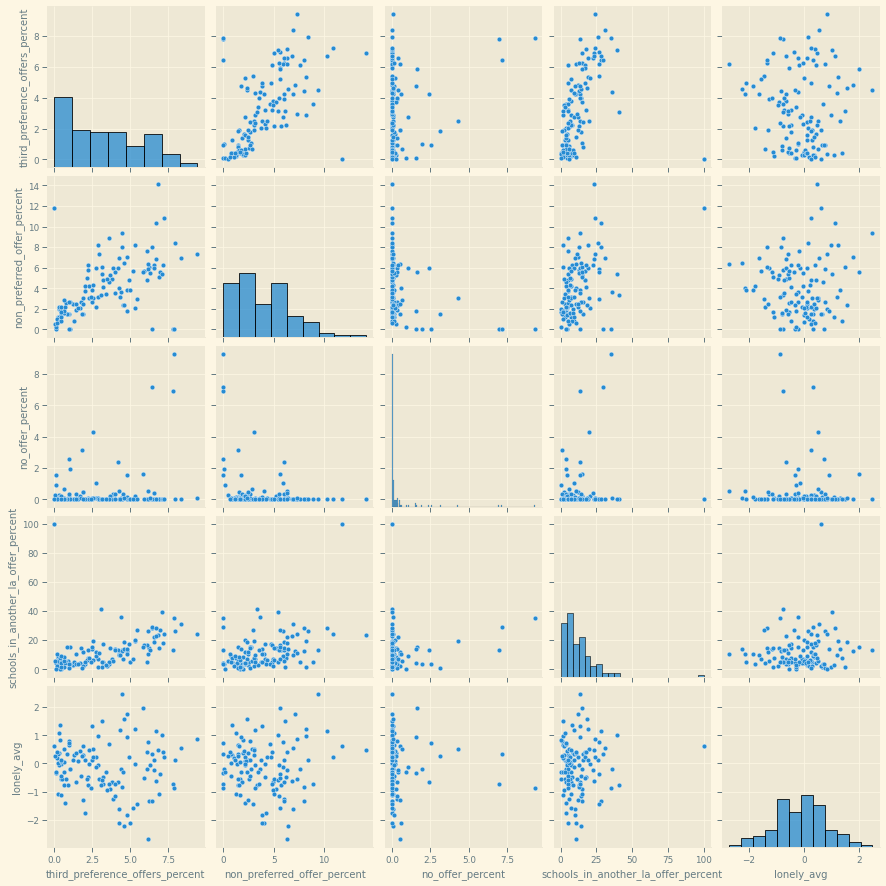

In [5]:

import seaborn as sns
import matplotlib
matplotlib.style.use('Solarize_Light2')
sns.set_context("paper", rc={"axes.labelsize":10})
sns.pairplot(main_df)
print(main_df.corr(method = 'spearman'))

                                     third_preference_offers_percent  \
third_preference_offers_percent                             1.000000   
non_preferred_offer_percent                                 0.526275   
no_offer_percent                                           -0.083404   
schools_in_another_la_offer_percent                         0.594463   
lonely_avg                                                  0.054355   

                                     non_preferred_offer_percent  \
third_preference_offers_percent                         0.526275   
non_preferred_offer_percent                             1.000000   
no_offer_percent                                       -0.299383   
schools_in_another_la_offer_percent                     0.366788   
lonely_avg                                             -0.073820   

                                     no_offer_percent  \
third_preference_offers_percent             -0.083404   
non_preferred_offer_percent                 

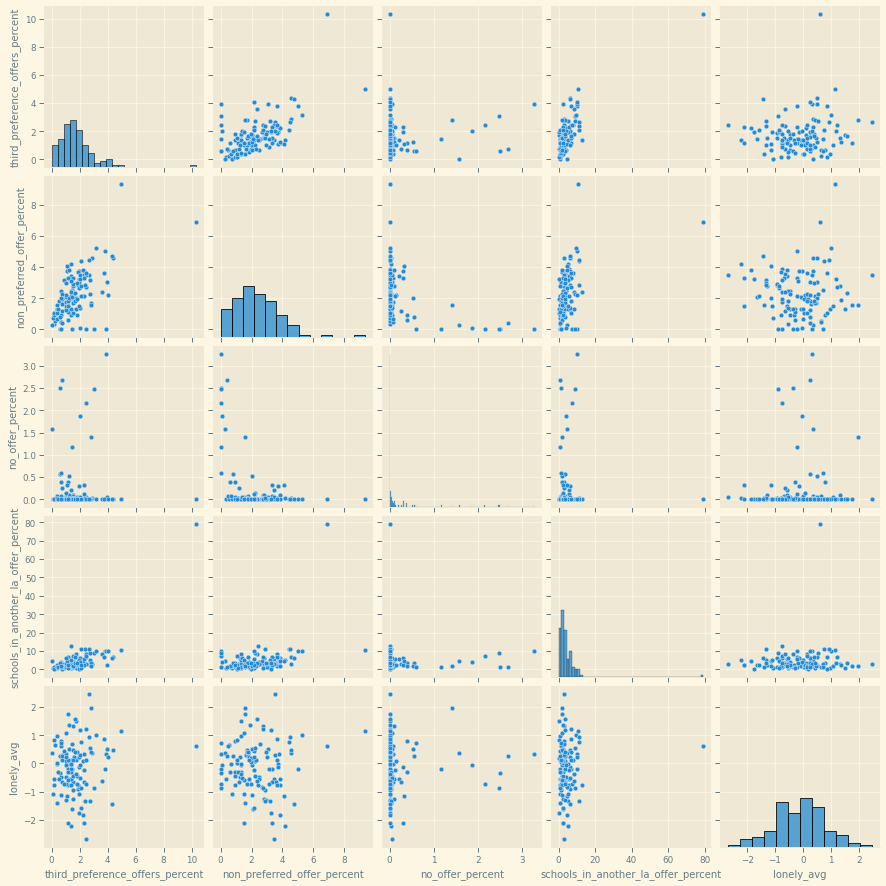

In [164]:
sns.pairplot(dfP)
print(dfP.corr(method = 'spearman'))

                perm_excl_rate  lonely_avg
perm_excl_rate        1.000000   -0.233475
lonely_avg           -0.233475    1.000000


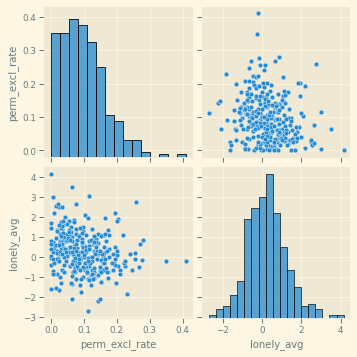

In [165]:
#Exclusion
sns.pairplot(main_dfEx)
print(main_dfEx.corr(method = 'spearman'))

             <2 A levels     < AAB  lonely_avg
<2 A levels     1.000000  0.541922   -0.098351
< AAB           0.541922  1.000000   -0.290320
lonely_avg     -0.098351 -0.290320    1.000000


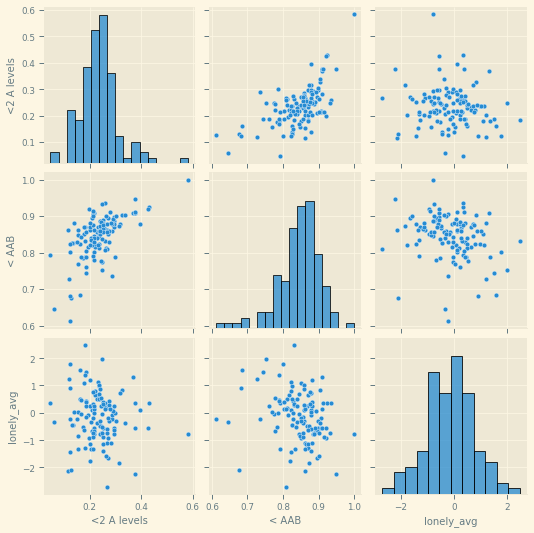

In [166]:
#A levels
sns.pairplot(main_dfA)
print(main_dfA.corr(method='spearman'))

                      Unsuccessful Appeals  lonely_avg
Unsuccessful Appeals              1.000000   -0.164173
lonely_avg                       -0.164173    1.000000


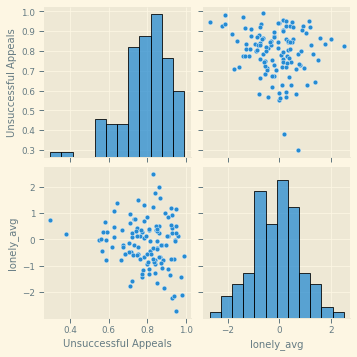

In [167]:
#Unsuccessful admission appeals
sns.pairplot(main_dfAdm)
print(main_dfAdm.corr())

                FSM Eligible %  lonely_avg
FSM Eligible %         1.00000    -0.18486
lonely_avg            -0.18486     1.00000


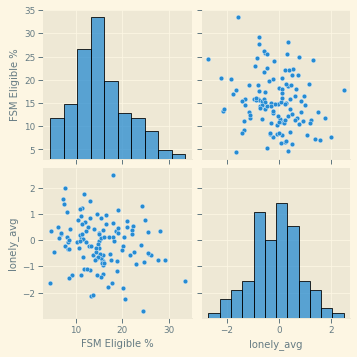

In [168]:
#Free School Meals
sns.pairplot(main_dfFSM)
print(main_dfFSM.corr())

                            % of ppl not doing degrees  lonely_avg
% of ppl not doing degrees                    1.000000    0.006117
lonely_avg                                    0.006117    1.000000


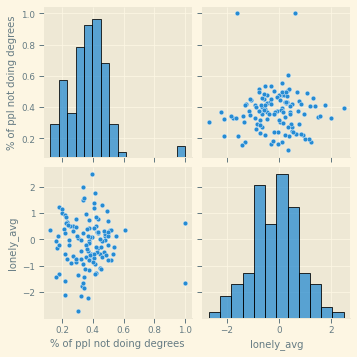

In [172]:
#People not landing degree destinations
sns.pairplot(main_dfPHE)
print(main_dfPHE.corr())

                            3rd Pref %P  Non Preferred Offer %P  No Offer %P  \
3rd Pref %P                    1.000000                0.614461     0.013595   
Non Preferred Offer %P         0.614461                1.000000    -0.413537   
No Offer %P                    0.013595               -0.413537     1.000000   
Offer in diff LA code %P       0.742339                0.406358     0.004060   
3rd Pref %S                    0.687731                0.302286     0.049901   
Non Preferred Offer %S         0.472658                0.507150    -0.302869   
No Offer %S                    0.211047               -0.296159     0.751174   
Offer in diff LA code %S       0.649802                0.353459     0.066531   
FSM Eligible %                      NaN                     NaN          NaN   
<2 A levels                   -0.187841               -0.022989    -0.053634   
< AAB                         -0.168038                0.006895     0.019185   
perm_excl_rate                -0.158251 

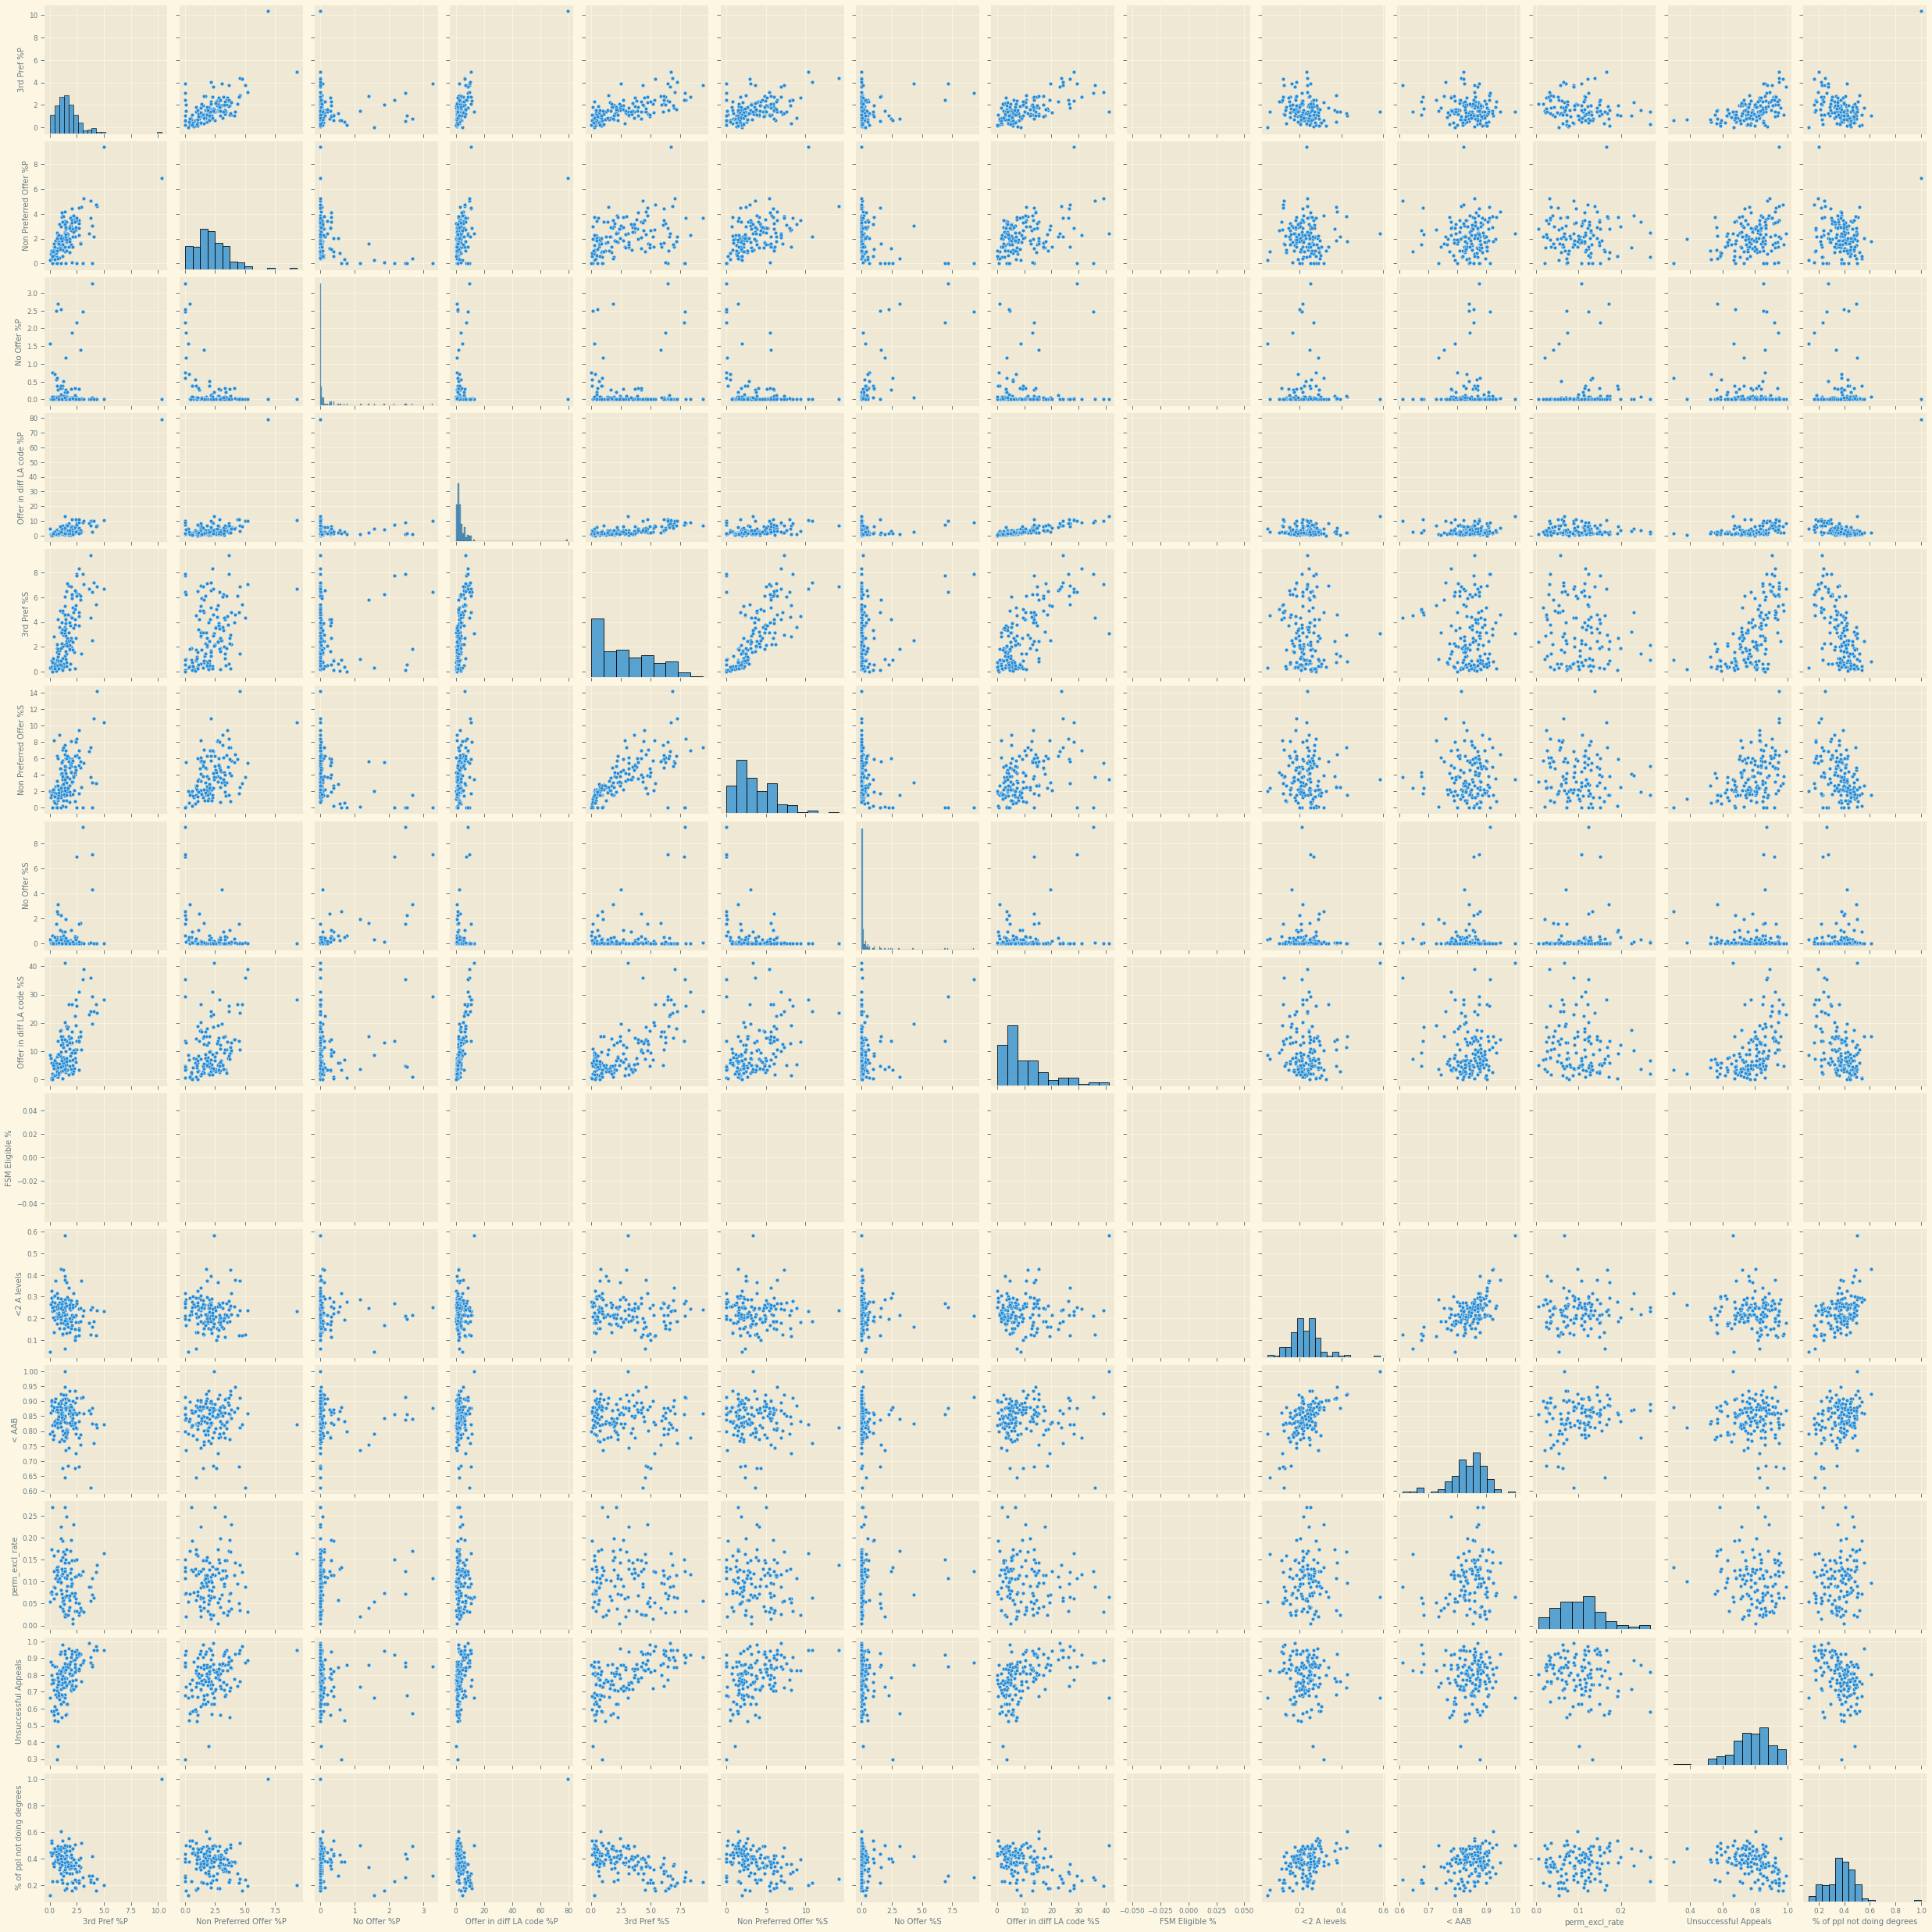

In [66]:
#final dataset plot
sns.pairplot(dfJ6)
print(dfJ6.corr())